<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,93.071927,50.788786,32.759062,84.551396,0.007031,271.178202,271.168655,0.009548
1,0.0,1.0,57.018499,46.546498,35.081101,63.030248,-0.010844,211.665502,211.673427,-0.007925
2,0.0,2.0,49.353697,42.533968,35.391249,73.113176,-0.001722,210.390368,210.386874,0.003494
3,0.0,3.0,72.140374,68.851282,22.839783,62.440193,0.005518,236.277150,236.271015,0.006135
4,0.0,4.0,72.804550,91.053686,56.734946,48.970164,-0.004390,279.558957,279.567619,-0.008663
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,97.059015,28.755158,67.962396,72.024254,0.021691,275.822515,275.808565,0.013950
249996,999.0,246.0,54.688127,63.881151,61.317408,78.881310,0.016119,268.784116,268.768338,0.015778
249997,999.0,247.0,27.073831,51.126733,87.218836,77.476247,0.001553,252.897201,252.896862,0.000339
249998,999.0,248.0,41.742287,72.824202,75.473095,51.088084,0.006815,251.134483,251.128686,0.005797


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    93.071927  50.788786  32.759062  84.551396  0.007031  271.178202   
      1.0    57.018499  46.546498  35.081101  63.030248 -0.010844  211.665502   
      2.0    49.353697  42.533968  35.391249  73.113176 -0.001722  210.390368   
      3.0    72.140374  68.851282  22.839783  62.440193  0.005518  236.277150   
      4.0    72.804550  91.053686  56.734946  48.970164 -0.004390  279.558957   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  97.059015  28.755158  67.962396  72.024254  0.021691  275.822515   
      246.0  54.688127  63.881151  61.317408  78.881310  0.016119  268.784116   
      247.0  27.073831  51.126733  87.218836  77.476247  0.001553  252.897201   
      248.0  41.742287  72.824202  75.473095  51.088084  0.006815  251.134483   
      249.0  42.782332  25.730485  39.129643  24.796176 -0.040818  142.397818   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    271.168655  0.009548  
      1.0    211.673427 -0.007925  
      2.0    210.386874  0.003494  
      3.0    236.271015  0.006135  
      4.0    279.567619 -0.008663  
...                 ...       ...  
999.0 245.0  275.808565  0.013950  
      246.0  268.768338  0.015778  
      247.0  252.896862  0.000339  
      248.0  251.128686  0.005797  
      249.0  142.439644 -0.041826  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    93.071927  50.788786  32.759062  84.551396  0.007031  271.178202   
      1.0    57.018499  46.546498  35.081101  63.030248 -0.010844  211.665502   
      2.0    49.353697  42.533968  35.391249  73.113176 -0.001722  210.390368   
      3.0    72.140374  68.851282  22.839783  62.440193  0.005518  236.277150   
      4.0    72.804550  91.053686  56.734946  48.970164 -0.004390  279.558957   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  97.059015  28.755158  67.962396  72.024254  0.021691  275.822515   
      246.0  54.688127  63.881151  61.317408  78.881310  0.016119  268.784116   
      247.0  27.073831  51.126733  87.218836  77.476247  0.001553  252.897201   
      248.0  41.742287  72.824202  75.473095  51.088084  0.006815  251.134483   
      249.0  42.782332  25.730485  39.129643  24.796176 -0.040818  142.397818   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    271.168655  0.009548  
      1.0    211.673427 -0.007925  
      2.0    210.386874  0.003494  
      3.0    236.271015  0.006135  
      4.0    279.567619 -0.008663  
...                 ...       ...  
999.0 245.0  275.808565  0.013950  
      246.0  268.768338  0.015778  
      247.0  252.896862  0.000339  
      248.0  251.128686  0.005797  
      249.0  142.439644 -0.041826  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,93.071927,50.788786,32.759062,84.551396,0.007031,271.178202,271.168655,0.009548
1,0.0,1.0,57.018499,46.546498,35.081101,63.030248,-0.010844,211.665502,211.673427,-0.007925
2,0.0,2.0,49.353697,42.533968,35.391249,73.113176,-0.001722,210.390368,210.386874,0.003494
3,0.0,3.0,72.140374,68.851282,22.839783,62.440193,0.005518,236.277150,236.271015,0.006135
4,0.0,4.0,72.804550,91.053686,56.734946,48.970164,-0.004390,279.558957,279.567619,-0.008663
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,97.059015,28.755158,67.962396,72.024254,0.021691,275.822515,275.808565,0.013950
249996,999.0,246.0,54.688127,63.881151,61.317408,78.881310,0.016119,268.784116,268.768338,0.015778
249997,999.0,247.0,27.073831,51.126733,87.218836,77.476247,0.001553,252.897201,252.896862,0.000339
249998,999.0,248.0,41.742287,72.824202,75.473095,51.088084,0.006815,251.134483,251.128686,0.005797


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    93.071927  50.788786  32.759062  84.551396  0.007031  271.178202   
      1.0    57.018499  46.546498  35.081101  63.030248 -0.010844  211.665502   
      2.0    49.353697  42.533968  35.391249  73.113176 -0.001722  210.390368   
      3.0    72.140374  68.851282  22.839783  62.440193  0.005518  236.277150   
      4.0    72.804550  91.053686  56.734946  48.970164 -0.004390  279.558957   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  97.059015  28.755158  67.962396  72.024254  0.021691  275.822515   
      246.0  54.688127  63.881151  61.317408  78.881310  0.016119  268.784116   
      247.0  27.073831  51.126733  87.218836  77.476247  0.001553  252.897201   
      248.0  41.742287  72.824202  75.473095  51.088084  0.006815  251.134483   
      249.0  42.782332  25.730485  39.129643  24.796176 -0.040818  142.397818   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    271.168655  0.009548  
      1.0    211.673427 -0.007925  
      2.0    210.386874  0.003494  
      3.0    236.271015  0.006135  
      4.0    279.567619 -0.008663  
...                 ...       ...  
999.0 245.0  275.808565  0.013950  
      246.0  268.768338  0.015778  
      247.0  252.896862  0.000339  
      248.0  251.128686  0.005797  
      249.0  142.439644 -0.041826  

[250000 rows x 8 columns]

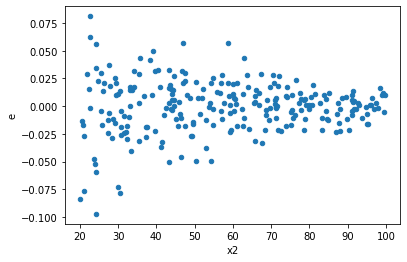

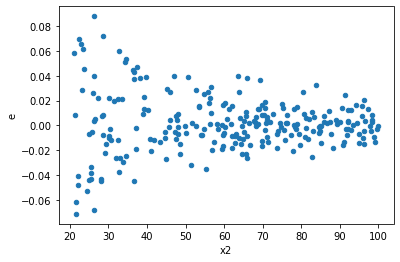

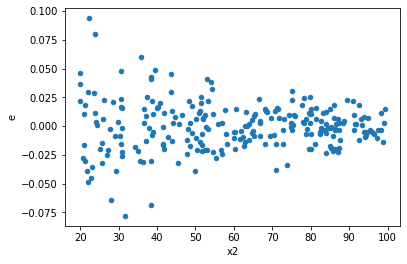

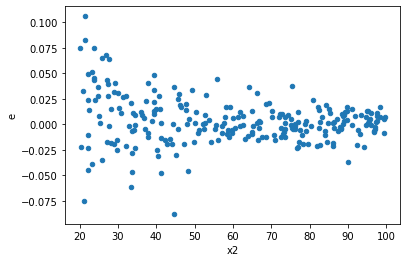

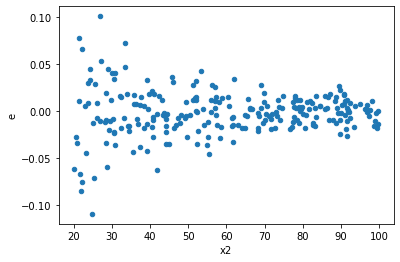

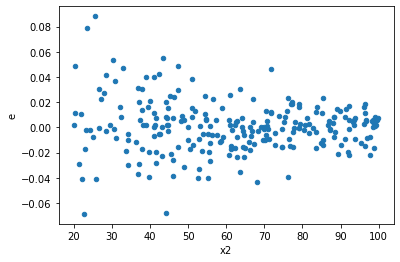

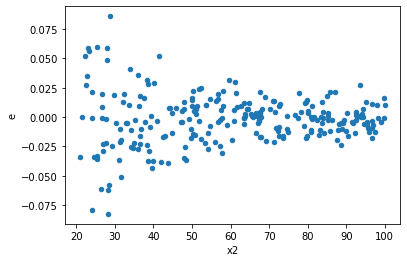

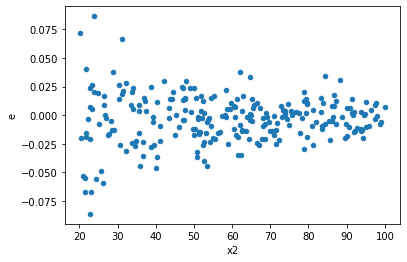

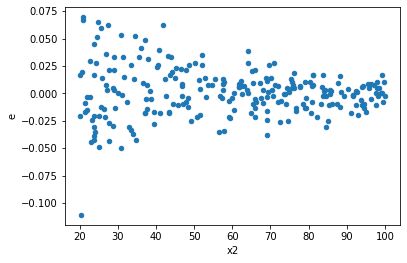

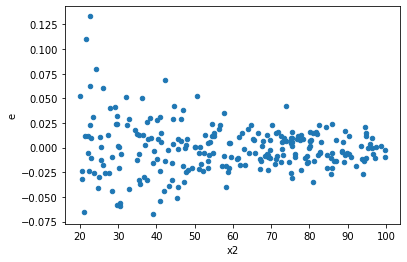

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,119.0,123.0,0.051262371974087284,0.08391029679745732,0.0004307762350763637,0.0006821975349386774,1.5836470988650158,0.011864546298876233,0.9940677268505619,0.0059322731494381165,Reject005=0 : Heteroscedasticity
3.0,130.0,112.0,0.025084222957692817,0.1033313995334986,0.00019295556121302166,0.0009226017815490946,4.781421047152657,8.881784197001252e-16,0.9999999999999996,4.440892098500626e-16,Reject005=0 : Heteroscedasticity
6.0,129.0,113.0,0.045823699768646746,0.06672958812012719,0.000355222478826719,0.0005905273284967008,1.6624154260934763,0.005964435581125693,0.9970177822094372,0.0029822177905628466,Reject005=0 : Heteroscedasticity
7.0,128.0,114.0,0.056643466204737515,0.055156172551283425,0.00044252707972451184,0.00048382607501125814,1.0933253515523984,0.6277614677066596,0.6861192661466702,0.3138807338533298,Reject005=1 : Homoscedasticity
8.0,129.0,113.0,0.022640213321337633,0.09521097934531564,0.00017550552962277235,0.0008425750384541207,4.800846105904085,6.661338147750939e-16,0.9999999999999997,3.3306690738754696e-16,Reject005=0 : Heteroscedasticity
10.0,118.0,124.0,0.04156275349347283,0.056244898436113314,0.0003522267245209562,0.00045358789061381705,1.2877725028693279,0.16488174385529275,0.9175591280723536,0.08244087192764638,Reject005=1 : Homoscedasticity
12.0,112.0,130.0,0.06399509887875067,0.08115397148220559,0.0005713848114174167,0.0006242613190938891,1.0925409752235158,0.6245515108105955,0.6877242445947023,0.31227575540529773,Reject005=1 : Homoscedasticity
17.0,125.0,117.0,0.021348548769657045,0.07247838127344247,0.00017078839015725636,0.000619473344217457,3.627139664745749,1.0569545239036415e-11,0.9999999999947152,5.284772619518208e-12,Reject005=0 : Heteroscedasticity
18.0,120.0,122.0,0.03447783302348211,0.07976564551552841,0.0002873152751956843,0.0006538167665207247,2.2756074005303897,8.307496727866237e-06,0.9999958462516361,4.1537483639331185e-06,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,119.0,123.0,0.051262371974087284,0.08391029679745732,0.0004307762350763637,0.0006821975349386774,1.5836470988650158,0.011864546298876233,Reject005=0 : Heteroscedasticity
1.0,123.0,119.0,0.08950379631546597,0.04152211593323775,0.0007276731407761461,0.0003489253439767878,0.4795083457452054,6.375743977538944e-05,Reject005=0 : Heteroscedasticity
2.0,142.0,100.0,0.07048626892170012,0.034223062028797775,0.0004963821755049304,0.00034223062028797773,0.6894498577428844,0.041677981524028566,Reject005=0 : Heteroscedasticity
3.0,130.0,112.0,0.025084222957692817,0.1033313995334986,0.00019295556121302166,0.0009226017815490946,4.781421047152657,8.881784197001252e-16,Reject005=0 : Heteroscedasticity
4.0,114.0,128.0,0.08290593583085831,0.05993202459498382,0.0007272450511478799,0.0004682189421483111,0.6438255460236912,0.0168665991410344,Reject005=0 : Heteroscedasticity
5.0,117.0,125.0,0.04974018520429716,0.05159523722111551,0.0004251297880709159,0.0004127618977689241,0.9709079658752852,0.8729444057500936,Reject005=1 : Homoscedasticity
6.0,129.0,113.0,0.045823699768646746,0.06672958812012719,0.000355222478826719,0.0005905273284967008,1.6624154260934763,0.005964435581125693,Reject005=0 : Heteroscedasticity
7.0,128.0,114.0,0.056643466204737515,0.055156172551283425,0.00044252707972451184,0.00048382607501125814,1.0933253515523984,0.6277614677066596,Reject005=1 : Homoscedasticity
8.0,129.0,113.0,0.022640213321337633,0.09521097934531564,0.00017550552962277235,0.0008425750384541207,4.800846105904085,6.661338147750939e-16,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    547
Reject005=1 : Homoscedasticity      453
Name: Result_test, dtype: int64